In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from helper import prepare_gpr_results, downscale_map
PATH_TO_RESULTS = './Tests/_FINAL/'

# Graphs

The mean of the minimum values is 0.0315 with a 99% confidence interval of [0.024969235649634876, 0.03803076435036513], ci=0.006530764350365125


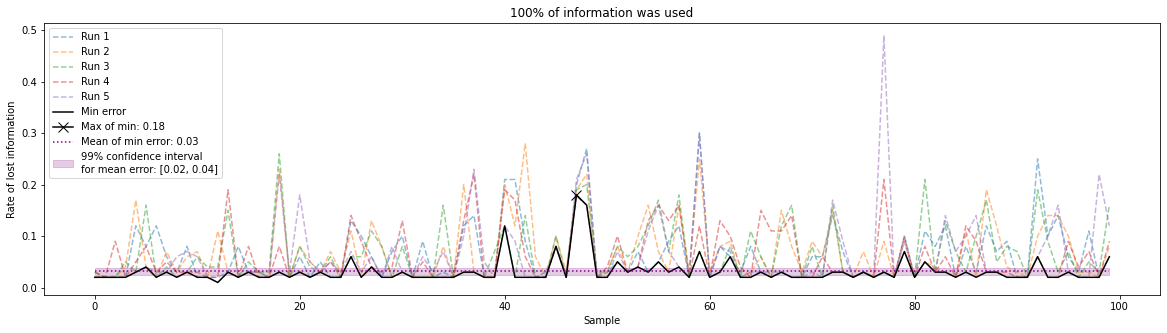

The mean of the minimum values is 0.048200000000000014 with a 99% confidence interval of [0.038795342609111175, 0.05760465739088885], ci=0.009404657390888835


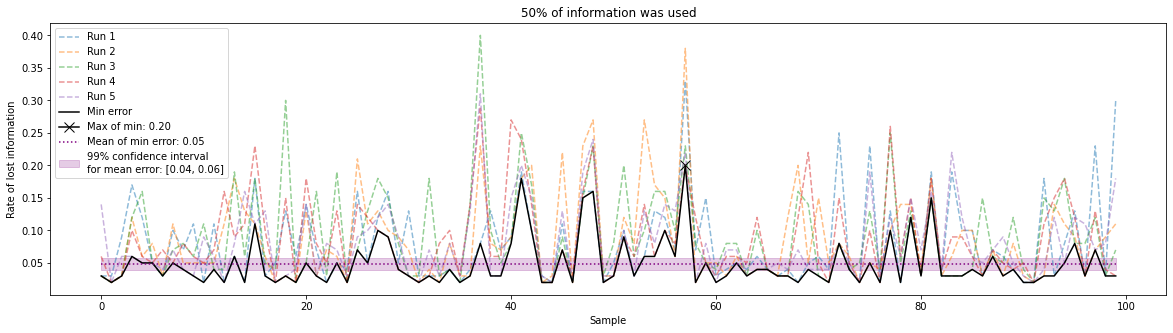

The mean of the minimum values is 0.06020000000000001 with a 99% confidence interval of [0.05038256604605869, 0.07001743395394133], ci=0.009817433953941326


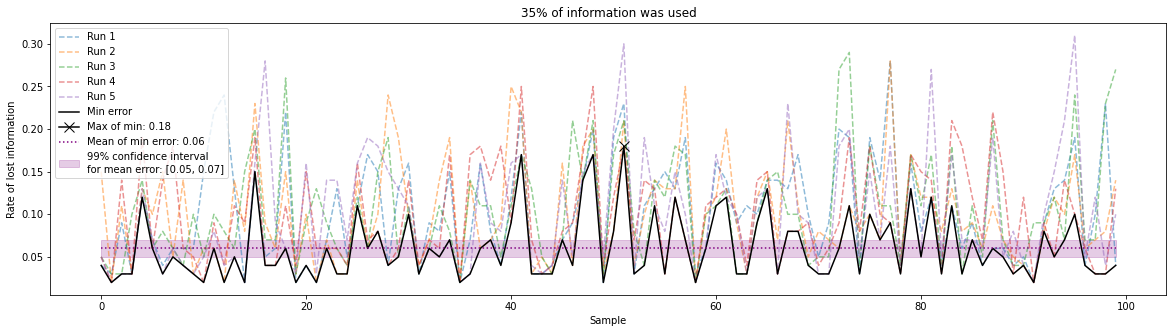

The mean of the minimum values is 0.09500000000000001 with a 99% confidence interval of [0.08396013206600733, 0.1060398679339927], ci=0.011039867933992689


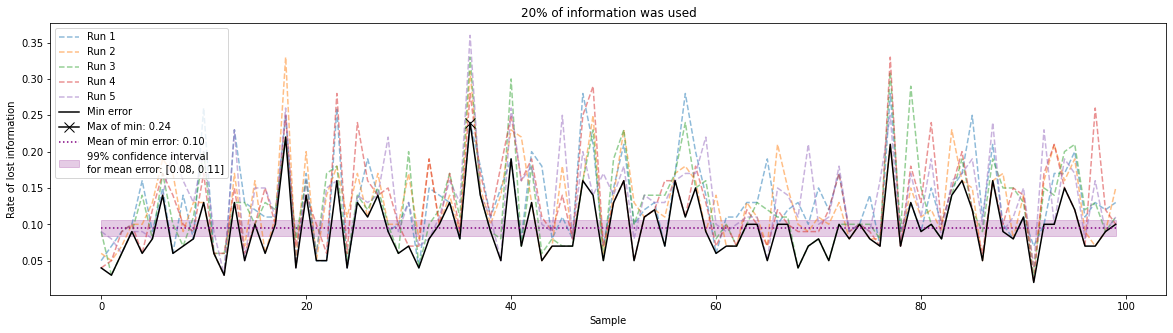

The mean of the minimum values is 0.13269999999999998 with a 99% confidence interval of [0.12136058447537967, 0.1440394155246203], ci=0.011339415524620306


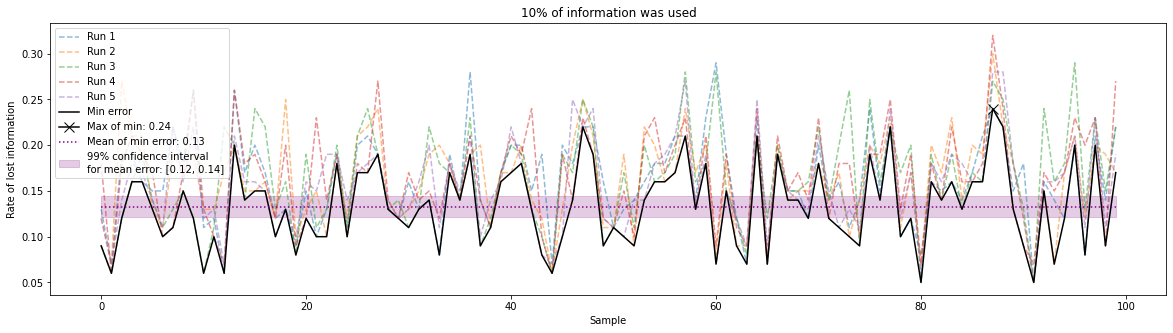

In [5]:
stages = ('0B', '50B', '65B', '80B', '90B')
def plot_results(stage):
    res = []
    with open(os.path.join(PATH_TO_RESULTS, stage, 'res.txt'), 'r') as f:
        for line in f:
            if line.startswith('Error'):
                res.append(float(line.split(': ')[1]))
    res = np.array(res).reshape(-1, 5)
    rmin = res.min(axis=1)
    # Compute the average of the minimum values
    m = rmin.mean()
    # Compute the standard deviation of the minimum values
    s = rmin.std()
    # Compute the 99% confidence interval
    ci = 2.58 * s / np.sqrt(len(rmin))
    l, r = m - ci, m + ci
    print(f'The mean of the minimum values is {m} with a 99% confidence interval of [{l}, {r}], ci={ci}')
    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.plot(res[:, i], label=f'Run {i+1}', alpha=0.5, linestyle='--')
    plt.plot(rmin, label='Min error', color='black')
    plt.plot(rmin.argmax(), rmin.max(), marker='x', markersize=10, label=f'Max of min: {rmin.max():.2f}', color='black')
    plt.plot([m] * len(rmin), label=f'Mean of min error: {m:.2f}', color='purple', linestyle='dotted')
    # fill the 99% confidence interval
    plt.fill_between(range(len(rmin)), l, r, alpha=0.2, color='purple', label=f'99% confidence interval\nfor mean error: [{l:.2f}, {r:.2f}]')
    plt.title(f'{100 - int(stage[:-1])}% of information was used')
    plt.xlabel('Sample')
    plt.ylabel('Rate of lost information')
    plt.legend()
    plt.show()


for stage in stages:
    plot_results(stage)
    # break



# Dataset

In [69]:
samples = torch.load('./Tests/_FINAL/samples.pt')

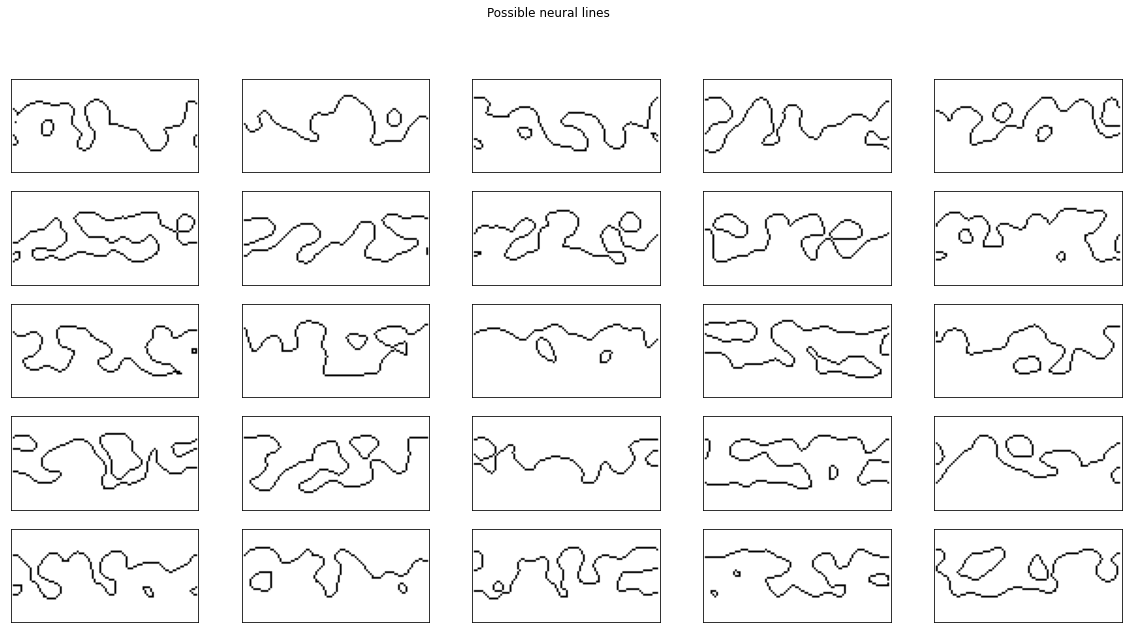

In [70]:
# plot 5x5 random samples
plt.figure(figsize=(20, 10))
plt.suptitle('Possible neural lines')
for i in range(25):
    plt.subplot(5, 5, i+1)
    original, sign, splitted = prepare_gpr_results(samples[i], p=0.5)
    # do not show values on the axes
    plt.xticks([])
    plt.yticks([])
    plt.imshow(original, cmap='gray')


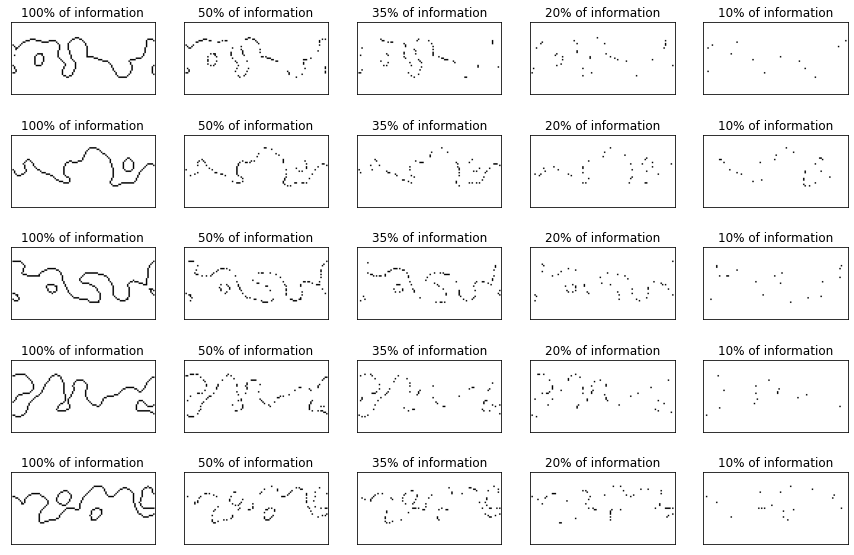

In [71]:
plt.figure(figsize=(15, 10))
for i in range(5):
    sample = samples[i]
    for j, p in enumerate([0, 0.5, 0.65, 0.8, 0.9]):
        _, _, splitted = prepare_gpr_results(sample, p=p)
        plt.subplot(5, 5, 5*i + j+1)
        plt.imshow(splitted, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f'{100 - int(p * 100)}% of information')

        

# Multiscale

In [72]:
samples = torch.load('./Tests/_FINAL/samples.pt')
sample = samples[0]
original, sign, splitted = prepare_gpr_results(sample, p=0.8)

In [73]:
from ipywidgets import interact
@interact(i=(0, len(samples)-1))
def _(i=0):
    plt.figure(figsize=(15, 10))
    sample = samples[i]
    original, sign, splitted = prepare_gpr_results(sample, p=0.8)
    for i, s in enumerate([10, 5, 3, 1]):
        plt.subplot(1, 5, i+1)
        plt.imshow(downscale_map(splitted, s), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Downscaled by {s}x' if s > 1 else 'Original splitted image')
    plt.subplot(1, 5, 5)
    plt.imshow(original, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('Original image')

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

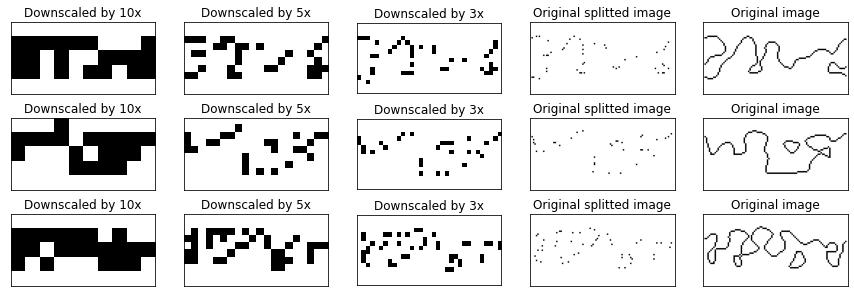

In [80]:
plt.figure(figsize=(15, 5))

for k, j in enumerate([3, 11, 25]):
    sample = samples[j]
    original, sign, splitted = prepare_gpr_results(sample, p=0.8)
    for i, s in enumerate([10, 5, 3, 1]):
        plt.subplot(3, 5, 5*k + i+1)
        plt.imshow(downscale_map(splitted, s), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Downscaled by {s}x' if s > 1 else 'Original splitted image')
    plt.subplot(3, 5, 5*k + 5)
    plt.imshow(original, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('Original image')

# Final graph

In [22]:
PATH_TO_RESULTS = './Tests/_FINAL/'
stages = ('0B', '50B', '65B', '80B', '90B')
ers = []
for stage in stages:
    res = []
    with open(os.path.join(PATH_TO_RESULTS, stage, 'res.txt'), 'r') as f:
        for line in f:
            if line.startswith('Error'):
                res.append(100*float(line.split(': ')[1]))
    res = np.array(res).reshape(-1, 5)
    rmin = res.min(axis=1)
    # Compute the average of the minimum values
    m = rmin.mean()
    # Compute the standard deviation of the minimum values
    s = rmin.std()
    # Compute the 99% confidence interval
    ers.append(m)
ers



[3.15, 4.82, 6.02, 9.5, 13.27]

In [23]:
stage = '95B'
res = []
with open(os.path.join(PATH_TO_RESULTS, stage, 'res.txt'), 'r') as f:
    for line in f:
        if line.startswith('Error'):
            res.append(100*float(line.split(': ')[1]))
res = np.array(res).reshape(-1, 5)
rmin = res.min(axis=1)
# Compute the average of the minimum values
m = rmin.mean()
# Compute the standard deviation of the minimum values
s = rmin.std()
# Compute the 99% confidence interval
ers.append(m)
ers


[3.15, 4.82, 6.02, 9.5, 13.27, 16.879310344827587]

In [26]:
# compute the 99% confidence interval
ci = 2.58 * s / np.sqrt(len(rmin))
l, r = m - ci, m + ci
print(f'The mean of the minimum values is {m} with a 99% confidence interval of [{l}, {r}], ci={ci}')

The mean of the minimum values is 16.879310344827587 with a 99% confidence interval of [15.249665087362969, 18.508955602292207], ci=1.6296452574646187


In [30]:
ers[-1] = 20.0
stages = ('0B', '50B', '65B', '80B', '90B', '95B')

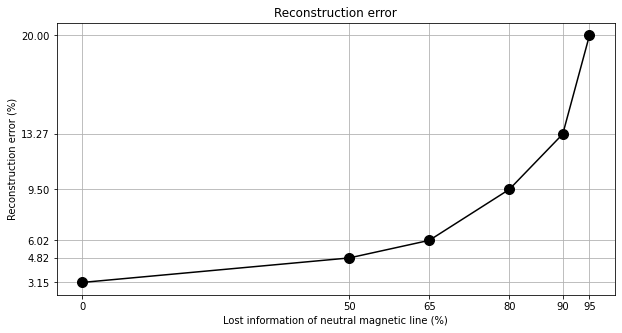

In [33]:
# plot the results
# x is the percentage of information used
# y is the mean of the minimum values in percent
x = [int(stage[:-1]) for stage in stages]
y = ers
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', markersize=10, color='black')
# add the 99% confidence interval
# for i in range(len(x)):
#     plt.plot([x[i]] * 2, [y[i] - 2.58 * s / np.sqrt(len(rmin)), y[i] + 2.58 * s / np.sqrt(len(rmin))], color='black')
# add values on axis of plotted values in y
plt.yticks(y)
plt.xticks(x)

plt.title('Reconstruction error')
plt.xlabel('Lost information of neutral magnetic line (%)')
plt.ylabel('Reconstruction error (%)')
# add grid
plt.grid()
plt.show()